In [2]:
# modules that you are likely to use

import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Wind and relative vorticity

For this section you will use the following skills:

1. loading NetCDF files using `xarray.open_dataset` (or multiple files at once with `xarray.open_mfdataset`)
2. plotting scalar fields with geographical information such as coastlines and borders in a specific geographic projection using `cartopy`
3. doing data-range selection (in space and time) with `xarray.Dataset.sel`
4. adding labels to a plot with `matplotlib.pyplot.text`

From the paper:

> Taylor et al. (2010) describe two important factors for the initiation and development of the system: (i) the distribution of wet and dry soil in the region of the initiation; and (ii) the influence of an atmospheric wave, emitted by a mature ‘parent’ storm (marked ‘P’ on Figure 1) that was situated ∼250 km to the south. The case study (‘daughter’) storm initiated at 16.5°N, 1°E over an area of dry soil (marked ‘D’ on Figure 1) that was within a wetter region created by the passage of a MCS on the previous day (30 July 2006). The initiation point was adjacent to a strong soil moisture gradient, upwind of a wet patch. Taylor et al. (2010) show that boundary‐layer air over the wet patch was cooler than over the dry soil and suggest that this induced a mesoscale circulation similar to a sea breeze, which initiated shallow convection.

> The African Easterly
Jet is weak at this time and lies at approximately 11 ◦ N. The
trough axis of an African Easterly Wave lies at 4 ◦ E, between
8 and 20 ◦ N. The winds at 700 hPa are predominantly
northeasterly over the MCS initiation location, which is
marked by the ‘D’

<img src='../figures/figure-1.png' width=500 />

**Figure 1: Relative vorticity (shading) and wind vectors at 700 hPa at 1200 UTC, 31 July 2006 from 4 km nest in the control simulation. The thick black lines mark the 10−5 s−1 relative vorticity contour. The domain sizes of the 4 and 12 km nests are illustrated by the two black boxes. The locations of the daughter and parent storms at 1200 UTC, 31 July 2006 are marked by the ‘D’ and ‘P’. **

In [3]:
# 1. Load in the dataset using `xarray.open_dataset` or `xarray.open_mfdataset`
#    We will be using the "ERA-Interim" reanalysis simulations, look in `data/ERA-Interim`
ds_ei_plevels = xr.open_mfdataset('../data/ERA-Interim/ei_model_levels.nc')
ds_ei_sfc = xr.open_mfdataset('../data/ERA-Interim/ei_surface.nc')
ds_ei = xr.merge([ds_ei_plevels, ds_ei_sfc])

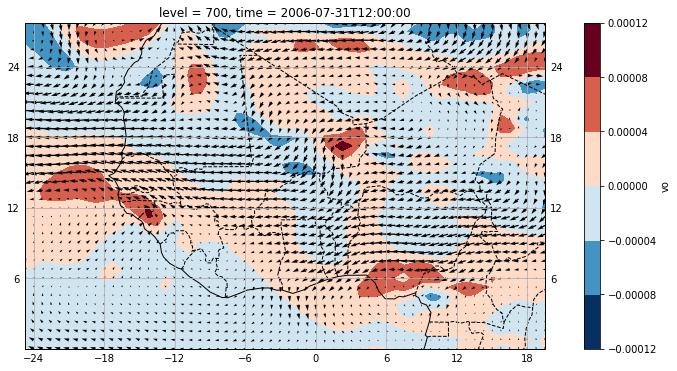

In [5]:
# 2. Create a matplotlib figure with `pyplot.figure` and a subplot with the PlateCarree projection 
#    which is available in cartopy.crs
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(projection=ccrs.PlateCarree())

# 3. Extract the correct pressure levelt, timestep and region from the dataset using `xarray.Dataset.sel`
ds_ = ds_ei.sel(level=700, time='2006-07-31 12:00', longitude=slice(-25, 20), latitude=slice(28, 0))

# 4. Create a filled contour plot with matplotlib's `contourf` (also available from the xarray DataArray), 
# remember to pass in the PlatCarree transform again (as the data is given on a lat/lon grid)
ds_.vo.plot.contourf(ax=ax, transform=ccrs.PlateCarree())

# 5. Create a "quiver"-plot, arrows representing the horizontal velocity
plt.quiver(*np.meshgrid(ds_.longitude, ds_.latitude, indexing='xy'), ds_.u, ds_.v)

# 6. Add coastlines (`ax.coastlines`), borders (with `ax.add_feature` and features from cartopy.features)
#    and grid lines (`ax.gridlines`)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False